In [12]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [14]:
#loading the data loan.csv to loan_data
loan_data = pd.read_csv('loan.csv',encoding = "ISO-8859-1")
loan_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# 1.Business Objective

Identifiying 5 important driver variables for loan defaulters,which will be helpful in reducing the credit loss


# 2.Data Understanding

In [15]:
#checking size of dataset
loan_data.shape

(39717, 111)

In [16]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# 3.Data Cleaning and Manipulation

In [17]:
#the shape of the data set is (39717, 111)
#i.e, 39717 rows and 111 columns indicate 111 attribute
#removing columns not relevant in the analysis
# Using the 'drop()' function to drop the irrelevant columns

loan_data = loan_data.drop(['delinq_2yrs',
                              'earliest_cr_line',
                              'inq_last_6mths',
                              'open_acc',
                              'pub_rec',
                              'revol_bal',
                              'revol_util',
                              'total_acc',
                              'out_prncp',
                              'out_prncp_inv',
                              'total_pymnt',
                              'total_pymnt_inv',
                              'total_rec_prncp',
                              'total_rec_int',
                              'total_rec_late_fee',
                              'recoveries',
                              'collection_recovery_fee',
                              'last_pymnt_d',
                              'last_pymnt_amnt',
                              'next_pymnt_d',
                              'last_credit_pull_d',
                              'application_type',
                              'member_id',
                            'id',
                            'acc_now_delinq',
                            'chargeoff_within_12_mths',
                            'pymnt_plan',
                            'initial_list_status',
                            'delinq_amnt',
                            'pub_rec_bankruptcies',
                            'tax_liens',
                            'collections_12_mths_ex_med',
                            'policy_code',
                            'url',
                            'desc',
                            'emp_title',
                            'zip_code',
                            'addr_state',
                            'title'],
                               axis = 1)
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#deleted irrelevant 19columns
#checking shape of dataset after removing columns
loan_data.shape

(39717, 72)

In [19]:
# Inspecting the percentages of Null values again

round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)


loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
purpose                             0.00
dti                                 0.00
mths_since_last_delinq             64.66
mths_since_last_record             92.99
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m     

In [20]:
#drop columns having null value more than 50%
loan_data = loan_data.drop(['mths_since_last_delinq',
                            'mths_since_last_record',
                            'mths_since_last_major_derog',
                            'mo_sin_rcnt_rev_tl_op',
                            'mo_sin_rcnt_tl',
                            'mths_since_recent_bc',
                            'mths_since_recent_bc_dlq',
                            'mths_since_recent_inq',
                            'mths_since_recent_revol_delinq',
                            'num_accts_ever_120_pd',
                            'num_actv_bc_tl',
                            'num_actv_rev_tl',
                            'num_bc_sats',
                            'num_bc_tl',
                            'num_il_tl',
                            'num_op_rev_tl',
                            'num_rev_accts',
                            'num_rev_tl_bal_gt_0',
                            'num_sats',
                            'num_tl_120dpd_2m',
                            'num_tl_30dpd',
                            'num_tl_90g_dpd_24m',
                            'num_tl_op_past_12m',
                            'pct_tl_nvr_dlq',
                            'percent_bc_gt_75',
                           'total_bal_ex_mort',
                           'total_bc_limit',
                            'annual_inc_joint',
                            'dti_joint',
                            'tot_coll_amt',
                            'open_acc_6m',
                            'open_il_6m',
                            'open_il_12m',
                            'open_il_24m',
                            'mths_since_rcnt_il',
                            'total_bal_il',
                            'il_util',
                            'open_rv_12m',
                            'open_rv_24m',
                            'max_bal_bc',
                            'all_util',
                            'total_rev_hi_lim',
                            'inq_fi',
                            'total_cu_tl',
                            'inq_last_12m',
                            'acc_open_past_24mths',
                            'avg_cur_bal',
                            'bc_open_to_buy',
                            'bc_util',
                            'mo_sin_old_il_acct',
                            'mo_sin_old_rev_tl_op',
                            'mort_acc',
                            'tot_hi_cred_lim',
                            'verification_status_joint',
                            'tot_cur_bal',
                            'total_il_high_credit_limit'
                           ],
                               axis = 1)

In [21]:
# Inspecting the percentages of Null values again

round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

loan_amnt              0.00
funded_amnt            0.00
funded_amnt_inv        0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             2.71
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
issue_d                0.00
loan_status            0.00
purpose                0.00
dti                    0.00
dtype: float64

In [22]:
# Since 'emp_lenght'  columns have large number of null values, drop all the rows with NaNs at this column using the
# 'isnan' function of NumPy alongwith a negation '~'

loan_data = loan_data[~pd.isnull(loan_data['emp_length'])]
loan_data

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00
4,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,17.94
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,5.35
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,5.55
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,18.08


In [23]:
# Inspecting the percentages of Null values again

round(100*(loan_data.isnull().sum()/len(loan_data.index)), 2)

loan_amnt              0.0
funded_amnt            0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
dtype: float64

In [99]:
#removing "%" from 'int_rate' column
loan_data['int_rate'] = loan_data['int_rate'].map(lambda x: str(x)[:-1])
#removing "months" 'term' column
loan_data['term'] = loan_data['term'].map(lambda x: str(x)[:-6])
loan_data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65
1,2500,2500,2500.0,60,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00
4,3000,3000,3000.0,60,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,7000,7000,7000.0,60,15.96,170.08,C,C5,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51
7,3000,3000,3000.0,36,18.64,109.43,E,E1,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,5.35
8,5600,5600,5600.0,60,21.28,152.39,F,F2,4 years,OWN,40000.0,Source Verified,Dec-11,Charged Off,small_business,5.55
9,5375,5375,5350.0,60,12.69,121.45,B,B5,< 1 year,RENT,15000.0,Verified,Dec-11,Charged Off,other,18.08


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti
0,5000,5000,4975.00000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,credit_card,27.65
1,2500,2500,2500.00000,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,car,1.00
2,2400,2400,2400.00000,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,small_business,8.72
3,10000,10000,10000.00000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,other,20.00
4,3000,3000,3000.00000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.00,Source Verified,Dec-11,Current,other,17.94
5,5000,5000,5000.00000,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.00,Source Verified,Dec-11,Fully Paid,wedding,11.20
6,7000,7000,7000.00000,60 months,15.96%,170.08,C,C5,8 years,RENT,47004.00,Not Verified,Dec-11,Fully Paid,debt_consolidation,23.51
7,3000,3000,3000.00000,36 months,18.64%,109.43,E,E1,9 years,RENT,48000.00,Source Verified,Dec-11,Fully Paid,car,5.35
8,5600,5600,5600.00000,60 months,21.28%,152.39,F,F2,4 years,OWN,40000.00,Source Verified,Dec-11,Charged Off,small_business,5.55
9,5375,5375,5350.00000,60 months,12.69%,121.45,B,B5,< 1 year,RENT,15000.00,Verified,Dec-11,Charged Off,other,18.08


In [100]:
#splitting and copying year from 'issue_d' to a new column 'issue_year'
# new data frame with split value columns 
new = loan_data["issue_d"].str.split("-", n = 1, expand = True)   
# making seperate second name column from new data frame 
loan_data["issue_year"]= new[1] 



  


In [101]:
# Eliminating column having 'loan_status' as “Current”, as they are still active loans
loan_data = loan_data[~loan_data['loan_status'].isin(['Current'])]

# 2.Data Analysis

In [102]:
#replacing 'Fully Paid ' and 'Charged Off' to Non-defaulter and Defaulter respectively in 'loan_status' column
loan_data['loan_status'].replace('Fully Paid','Non-defaulter',inplace=True)
loan_data['loan_status'].replace('Charged Off','Defaulter',inplace=True)

In [103]:
loan_data['loan_status_int'] = loan_data['loan_status']

In [104]:
loan_data['loan_status_int'].replace('Non-defaulter','0',inplace=True)
loan_data['loan_status_int'].replace('Defaulter','1',inplace=True)

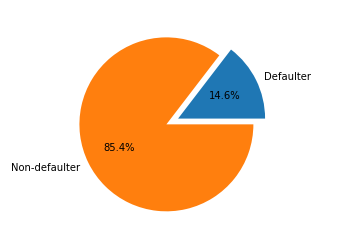

<Figure size 432x288 with 0 Axes>

In [105]:
#overall Defaulters
#pie chart showing the loan defaulters and non-defaulters
sums = loan_data['loan_status_int'].groupby(loan_data.loan_status).count()
plt.axis('equal');
plt.pie(sums, labels=sums.index, explode=(0,0.15),autopct='%1.1f%%');
plt.show()
plt.savefig('Defaultersinfo.png')

It is clear from the pie chart that 14.6% percentage of the customers are defaulters

# 2.1.2 Univariate Analysis

11    53.181948
10    29.893460
09    12.224901
08     4.049045
07     0.650647
Name: issue_year, dtype: float64

<Figure size 960x640 with 0 Axes>

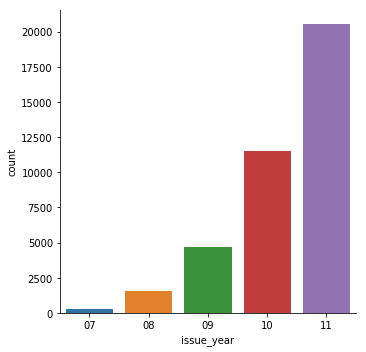

In [129]:
#Yearly loan request Distribution

plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.catplot(x="issue_year", kind="count", data=loan_data);
plt.savefig('plot1.png')
sums = loan_data['issue_year'].value_counts(normalize=True) * 100

plt.savefig('yearlyrequest.png')
sums


It is understood from the graph that the companys loan lending rates increased over years

# 2.1.3 Univariate Analysis


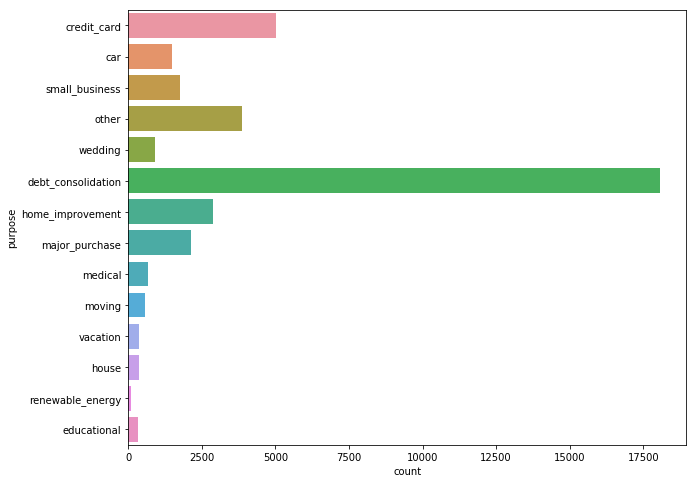

debt_consolidation    46.8
credit_card           13.0
other                 10.0
home_improvement       7.5
major_purchase         5.6
small_business         4.5
car                    3.9
wedding                2.4
medical                1.8
moving                 1.5
vacation               1.0
house                  1.0
educational            0.8
renewable_energy       0.3
Name: purpose, dtype: float64

<Figure size 432x288 with 0 Axes>

In [108]:
# Plotting count across a categorical variable 'purpose'
plt.figure(figsize=(10, 8))
sns.countplot(y="purpose", data=loan_data)
plt.show()
plt.savefig('purposeuni.png')
sums = round(loan_data['purpose'].value_counts(normalize=True) * 100,1)
sums


#46.8% applicants mentioned Debt Consolidation loan as purpose for loan 
#13% applicants mentioned credit card as purpose for loan
#10% applicants mentioned other as purpose for loan
#7.5% applicants mentioned Home improvement loan as purpose for loan
#5.6% applicants mentioned major purchase loanas purpose for loan
#4.5% applicants mentioned small_business  as purpose for loan


#Since 'other' purpose are not specific in the data,the information is not apt for analysing
#Debt consolidation,credit card,home improvement and major purchase are only considered for analysing here



# Driver variable : time

In [26]:
#top 4 purpose variation over time
#creating new dataframes 
debt_consolidation = loan_data[(loan_data['purpose'] == 'debt_consolidation') & (loan_data['loan_status'] == 'Defaulter')]
credit_card = loan_data[(loan_data['purpose'] == 'credit_card') & (loan_data['loan_status'] == 'Defaulter')]
home_improvement = loan_data[(loan_data['purpose'] == 'home_improvement') & (loan_data['loan_status'] == 'Defaulter')]
major_purchase = loan_data[(loan_data['purpose'] == 'major_purchase') & (loan_data['loan_status'] == 'Defaulter')]



In [27]:
#calculating the percentage rate of various purpose over years
sums1 = round(debt_consolidation['issue_year'].value_counts(normalize=True) * 100,0)
sums2 = round(credit_card['issue_year'].value_counts(normalize=True) * 100,0)
sums3 = round(home_improvement['issue_year'].value_counts(normalize=True) * 100,0)
sums4 = round(major_purchase['issue_year'].value_counts(normalize=True) * 100,0)
#sns.factorplot(x = "issue_year", hue = "purpose", row = "purpose", data = debt_consolidation, kind = 'count')
#sns.factorplot(x = "issue_year", hue = "purpose", row = "purpose", data = credit_card, kind = "count")
#sns.factorplot(x = "issue_year", hue = "purpose", row = "purpose", data = home_improvement, kind = "count")
#sns.factorplot(x = "issue_year", hue = "purpose", row = "purpose", data = major_purchase, kind = "count")



In [28]:
#creating new df containing year and percentage rate
sums1 = sums1.to_frame().reset_index()
sums2 = sums2.to_frame().reset_index()
sums3 = sums3.to_frame().reset_index()
sums4 = sums4.to_frame().reset_index()



In [29]:
#renaming columns
sums1=sums1.rename(columns = {'index':'year'})
sums1=sums1.rename(columns = {'issue_year':'percentage_debt_consolidation'})

sums2=sums2.rename(columns = {'index':'year'})
sums2=sums2.rename(columns = {'issue_year':'percentage_credit_card'})

sums3=sums3.rename(columns = {'index':'year'})
sums3=sums3.rename(columns = {'issue_year':'percentage_home_improvement'})

sums4=sums4.rename(columns = {'index':'year'})
sums4=sums4.rename(columns = {'issue_year':'percentage_major_purchase'})



In [30]:
#merging all the dfs
dfs = [sums1, sums2, sums3,sums4]
dfs = [df.set_index('year') for df in dfs]
purpose_over_time = dfs[0].join(dfs[1:])
purpose_over_time

,percentage_debt_consolidation,percentage_credit_card,percentage_home_improvement,percentage_major_purchase
year,,,,
11,61.0,60.0,56.0,46.0
10,25.0,24.0,28.0,40.0
09,9.0,9.0,11.0,9.0
08,4.0,7.0,4.0,4.0
07,1.0,0.0,1.0,0.0


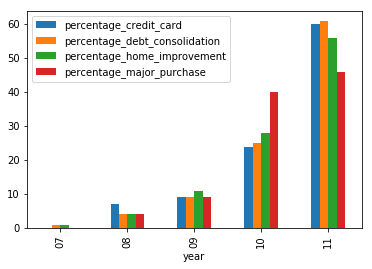

In [59]:
#ploting the 4 purpose variation over years
plot1 = purpose_over_time.pivot_table(values = ['percentage_debt_consolidation','percentage_credit_card','percentage_home_improvement','percentage_major_purchase'], index = 'year')
plot1.plot(kind = 'bar')
plt.savefig('purpose_over_year.png')

#in 2007, the defaulters were applicants with debt_consolidation and home_improvement purpose for loans
#in 2008,the highest defaulters were credit card purpose loans,here unlike 2007,borrowers with credit card and major purchase 
#started defaulting loans
#in 2009,highest percentage of defaaultes were borrowers who took loans for home improvement pupose
#in 2010,loans took for major purchases shows comparatively higher default rates(40%) than other purposes
#in the same year
#in 2011, loans took for debr_consolidation,credit card and home improvement purchases shows
#more than 50% default rates

#so,it is difficult to control one single purpose as the changes over years are eventhough
#increasing, but shows no patterns

# Default variable : term

In [32]:
#four 'purpose' variation over loan 'term'
#calculating the percentage rate of various purpose over terms
sums11 = round(debt_consolidation['term'].value_counts(normalize=True) * 100,0)
sums21 = round(credit_card['term'].value_counts(normalize=True) * 100,0)
sums31 = round(home_improvement['term'].value_counts(normalize=True) * 100,0)
sums41 = round(major_purchase['term'].value_counts(normalize=True) * 100,0)



In [33]:
#creating new df containing year and percentage rate
sums11 = sums11.to_frame().reset_index()
sums21 = sums21.to_frame().reset_index()
sums31 = sums31.to_frame().reset_index()
sums41 = sums41.to_frame().reset_index()




In [868]:
sums11

,index,term
0,36,53.0
1,60,47.0


In [34]:
sums11=sums11.rename(columns = {'term':'percentage_debt_consolidation'})
sums11=sums11.rename(columns = {'index':'terms'})

sums21=sums21.rename(columns = {'term':'percentage_credit_card'})
sums21=sums21.rename(columns = {'index':'terms'})


sums31=sums31.rename(columns = {'term':'percentage_home_improvement'})
sums31=sums31.rename(columns = {'index':'terms'})

sums41=sums41.rename(columns = {'term':'percentage_major_purchase'})
sums41=sums41.rename(columns = {'index':'terms'})
sums11



,terms,percentage_debt_consolidation
0,36,53.0
1,60,47.0


In [35]:
#merging all the dfs
dfs = [sums11, sums21, sums31,sums41]
dfs = [df.set_index('terms') for df in dfs]
purpose_over_term = dfs[0].join(dfs[1:])
purpose_over_term

,percentage_debt_consolidation,percentage_credit_card,percentage_home_improvement,percentage_major_purchase
terms,,,,
36,53.0,59.0,59.0,62.0
60,47.0,41.0,41.0,38.0


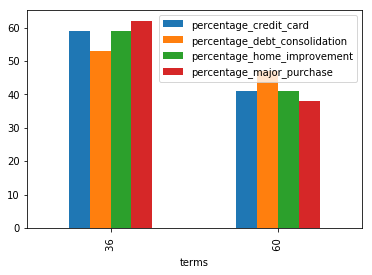

In [60]:
#ploting the 4 purpose variation over terms
plot2 = purpose_over_term.pivot_table(values = ['percentage_debt_consolidation','percentage_credit_card','percentage_home_improvement','percentage_major_purchase'], index = 'terms')
plot2.plot(kind = 'bar')
plt.savefig('plot5.png')
purpose_over_term = dfs[0].join(dfs[1:])
purpose_over_term
plt.savefig('purpose_over_term.png')

36 months term shows highest percentage of defaulters in top 4 loan purpose

# Default variable: Grade

In [37]:

#Grade Distribution in top-4 purpose
#four 'purpose' variation over loan 'grade'
#calculating the percentage rate of various purpose over grades
sums12 = round(debt_consolidation['grade'].value_counts(normalize=True) * 100,0)
sums22 = round(credit_card['grade'].value_counts(normalize=True) * 100,0)
sums32 = round(home_improvement['grade'].value_counts(normalize=True) * 100,0)
sums42 = round(major_purchase['grade'].value_counts(normalize=True) * 100,0)

In [38]:
sums12 = sums12.to_frame().reset_index()
sums22 = sums22.to_frame().reset_index()
sums32 = sums32.to_frame().reset_index()
sums42 = sums42.to_frame().reset_index()
sums12



,index,grade
0,C,23.0
1,B,23.0
2,D,21.0
3,E,15.0
4,A,9.0
5,F,7.0
6,G,2.0


In [39]:
sums12=sums12.rename(columns = {'grade':'percentage_debt_consolidation'})
sums12=sums12.rename(columns = {'index':'grades'})

sums22=sums22.rename(columns = {'grade':'percentage_credit_card'})
sums22=sums22.rename(columns = {'index':'grades'})


sums32=sums32.rename(columns = {'grade':'percentage_home_improvement'})
sums32=sums32.rename(columns = {'index':'grades'})

sums42=sums42.rename(columns = {'grade':'percentage_major_purchase'})
sums42=sums42.rename(columns = {'index':'grades'})
sums12


,grades,percentage_debt_consolidation
0,C,23.0
1,B,23.0
2,D,21.0
3,E,15.0
4,A,9.0
5,F,7.0
6,G,2.0


In [40]:
#merging all the dfs
dfs = [sums12, sums22, sums32,sums42]
dfs = [df.set_index('grades') for df in dfs]
purpose_over_grade = dfs[0].join(dfs[1:])
purpose_over_grade

,percentage_debt_consolidation,percentage_credit_card,percentage_home_improvement,percentage_major_purchase
grades,,,,
C,23.0,26.0,27.0,26.0
B,23.0,28.0,29.0,23.0
D,21.0,18.0,17.0,23.0
E,15.0,12.0,11.0,9.0
A,9.0,12.0,12.0,17.0
F,7.0,4.0,4.0,2.0
G,2.0,1.0,1.0,0.0


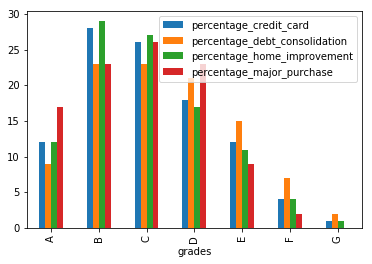

In [61]:
#ploting the 4 purpose variation over terms

plot2 = purpose_over_grade.pivot_table(values = ['percentage_debt_consolidation','percentage_credit_card','percentage_home_improvement','percentage_major_purchase'], index = 'grades')
plot2.plot(kind = 'bar')
plt.savefig('plot5.png')
purpose_over_grade = dfs[0].join(dfs[1:])
purpose_over_grade
plt.savefig('purpose_over_grade.png')


borrwers within B,C and D categories are the highest defulters

# Default variable :Interest rate

In [42]:
#mean interest rate across top 4 purpose for loans
#calculating the mean value over purposes
#merging all the dfs


purpose_over_interestrate = pd.concat([debt_consolidation, credit_card, home_improvement,major_purchase])
purpose_over_interestrate.head(10)


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,issue_year,loan_status_int
12,9000,9000,9000.0,36,13.49,305.38,C,C1,< 1 year,RENT,30000.0,Source Verified,Dec-11,Defaulter,debt_consolidation,10.08,11,1
21,21000,21000,21000.0,36,12.42,701.73,B,B4,10+ years,RENT,105000.0,Verified,Dec-11,Defaulter,debt_consolidation,13.22,11,1
26,15000,15000,8725.0,36,14.27,514.64,C,C2,9 years,RENT,60000.0,Not Verified,Dec-11,Defaulter,debt_consolidation,15.22,11,1
46,5000,5000,5000.0,36,8.90,158.77,A,A5,10+ years,MORTGAGE,100000.0,Source Verified,Dec-11,Defaulter,debt_consolidation,16.33,11,1
50,15000,15000,15000.0,36,9.91,483.38,B,B1,8 years,MORTGAGE,80000.0,Not Verified,Dec-11,Defaulter,debt_consolidation,9.12,11,1
55,21000,21000,20975.0,60,19.91,555.33,E,E4,7 years,RENT,50000.0,Verified,Dec-11,Defaulter,debt_consolidation,21.58,11,1
64,10000,10000,9975.0,60,10.65,215.69,B,B2,10+ years,RENT,45996.0,Verified,Dec-11,Defaulter,debt_consolidation,21.73,11,1
66,12500,8925,8925.0,60,17.27,223.11,D,D3,5 years,RENT,30000.0,Source Verified,Dec-11,Defaulter,debt_consolidation,13.16,11,1
71,6400,6400,6400.0,36,16.77,227.45,D,D2,5 years,RENT,75000.0,Not Verified,Dec-11,Defaulter,debt_consolidation,20.22,11,1
100,6200,6200,6200.0,36,9.91,199.80,B,B1,2 years,RENT,25000.0,Not Verified,Dec-11,Defaulter,debt_consolidation,20.64,11,1


In [43]:
purpose_over_interestrate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3878 entries, 12 to 39523
Data columns (total 18 columns):
loan_amnt              3878 non-null int64
funded_amnt            3878 non-null int64
funded_amnt_inv        3878 non-null float64
term                   3878 non-null object
int_rate               3878 non-null object
installment            3878 non-null float64
grade                  3878 non-null object
sub_grade              3878 non-null object
emp_length             3730 non-null object
home_ownership         3878 non-null object
annual_inc             3878 non-null float64
verification_status    3878 non-null object
issue_d                3878 non-null object
loan_status            3878 non-null object
purpose                3878 non-null object
dti                    3878 non-null float64
issue_year             3878 non-null object
loan_status_int        3878 non-null object
dtypes: float64(4), int64(2), object(12)
memory usage: 575.6+ KB


# Interest rate over purpose

In [121]:

#converting 'int_rate' type to float type
purpose_over_interestrate['int_rate'] = purpose_over_interestrate['int_rate'].astype(float)
sums14 = purpose_over_interestrate.groupby('purpose')['int_rate'].mean()

In [122]:
sums14 = sums14.to_frame().reset_index()


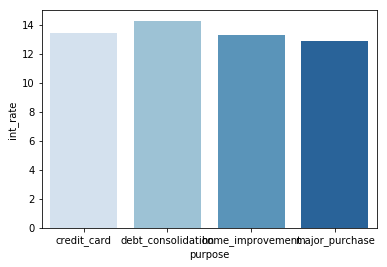

<Figure size 432x288 with 0 Axes>

In [123]:

#plt.figure(figsize=(20, 8))
sns.barplot(x="purpose",y = 'int_rate', data=sums14,palette = "Blues")
plt.show()
plt.savefig('purpose_over_interestrate.png')

In [119]:
sums14

,purpose,int_rate
0,credit_card,13.405000
1,debt_consolidation,14.275598
2,home_improvement,13.304006
3,major_purchase,12.860495


The average interst rate distribution of defaulters

# Interest rate over grades

In [63]:

sums15 = purpose_over_interestrate.groupby('grade')['int_rate'].mean()

In [64]:
sums15 = sums15.to_frame().reset_index()

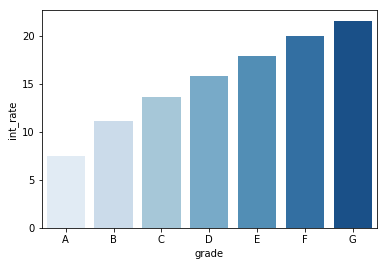

<Figure size 432x288 with 0 Axes>

In [66]:
#plt.figure(figsize=(20, 8))
sns.barplot(x="grade",y = 'int_rate', data=sums15,palette = "Blues")
plt.show()
plt.savefig('purpose_over_grade.png')

It is understood that the grades are based on the interest rates.Higher the grade, higher is the interest rate

# Default variable : Home ownership

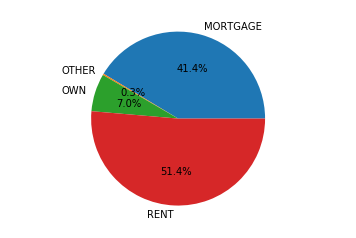

<Figure size 432x288 with 0 Axes>

In [124]:
#home ownership of borrowers based on their purpose of loan as debt_consolidation
sums = debt_consolidation['purpose'].groupby(debt_consolidation.home_ownership).count()
plt.axis('equal');
plt.pie(sums, labels=sums.index,autopct='%1.1f%%');
plt.show()
plt.savefig('purpose_over_home1.png')

51.4% of the defaulters who took loan for debt_consolidation stays on rent

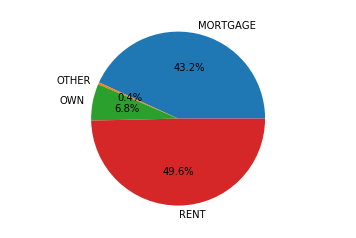

<Figure size 432x288 with 0 Axes>

In [69]:
#home ownership of borrowers based on their purpose of loan as credit card
sums = credit_card['purpose'].groupby(credit_card.home_ownership).count()
plt.axis('equal');
plt.pie(sums, labels=sums.index,autopct='%1.1f%%');
plt.show()
plt.savefig('purpose_over_home2.png')

49.6 % of the defaulters who took loan for credit_card stays on rent

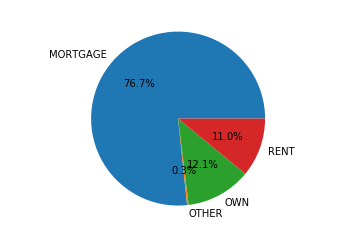

<Figure size 432x288 with 0 Axes>

In [68]:
#home ownership of borrowers based on their purpose of loan as home_improvement
sums = home_improvement['purpose'].groupby(home_improvement.home_ownership).count()
plt.axis('equal');
plt.pie(sums, labels=sums.index,autopct='%1.1f%%');
plt.show()
plt.savefig('purpose_over_home3.png')

76.7% of the defaulters who took loan for home improvement has mortgage as home ownership

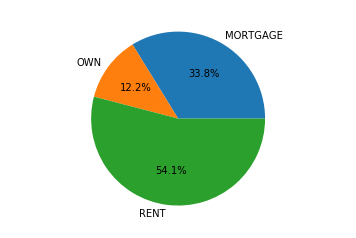

<Figure size 432x288 with 0 Axes>

In [125]:
#home ownership of borrowers based on their purpose of loan as major_purchase
sums = major_purchase['purpose'].groupby(major_purchase.home_ownership).count()
plt.axis('equal');
plt.pie(sums, labels=sums.index,autopct='%1.1f%%');
plt.show()
plt.savefig('purpose_over_home4.png')

54.1% defaulters who took loan for major purchases stays on rent

it can be concluded that borrowers who stays on rent has highest chance for defaulting loans